In [1]:

! pip install kaggle

     -------------------------------------- 59.0/59.0 kB 447.0 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73031 sha256=16996e4a9030b4628b0011d333e3b987a5a91c0af00380fb1ae4246fd158ffd5
  Stored in directory: c:\users\fatma.er\appdata\local\pip\cache\wheels\ac\b2\c3\fa4706d469b5879105991d1c8be9a3c2ef329ba9fe2ce5085e
Successfully built kaggle


In [3]:
# Kaggle API to download the dataset
import os
kaggle_api = {"username":"fatmaer","key":"02db3447e0d87603a7e4cb10816fe1b7"}
os.environ['KAGGLE_USERNAME'] = kaggle_api['username']
os.environ['KAGGLE_KEY'] = kaggle_api['key']

In [5]:
#Kaggle authentication and download
import kaggle 
kaggle.api.authenticate() 
! kaggle datasets download -d pashupatigupta/emotion-detection-from-text




  0%|          | 0.00/1.56M [00:00<?, ?B/s]
 64%|######4   | 1.00M/1.56M [00:02<00:01, 449kB/s]
100%|##########| 1.56M/1.56M [00:03<00:00, 545kB/s]
100%|##########| 1.56M/1.56M [00:03<00:00, 523kB/s]


In [6]:
! unzip emotion-detection-from-text

'unzip' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
import re
import os
from tqdm import tqdm
import csv
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
import re
from nltk.stem import WordNetLemmatizer



In [2]:
#stopword removing
import nltk
# download all 
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[n

[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already up-to-date!
[nltk_data]    | Downloading package names to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Downloading package nombank.1.0 to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package nombank.1.0 is already up-to-date!
[nltk_data]    | Downloading package nonbreak

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data

True

In [3]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\fatma.er\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/fatmaaerr/Text-Mining-and-Sentiment-Analysis-P8/main/Data/tweet_emotions.csv")


In [5]:
df.head(5)

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [6]:
df.shape

(40000, 3)

In [7]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df["sentiment"].value_counts()

neutral       8638
worry         8459
happiness     5209
sadness       5165
love          3842
surprise      2187
fun           1776
relief        1526
hate          1323
empty          827
enthusiasm     759
boredom        179
anger          110
Name: sentiment, dtype: int64

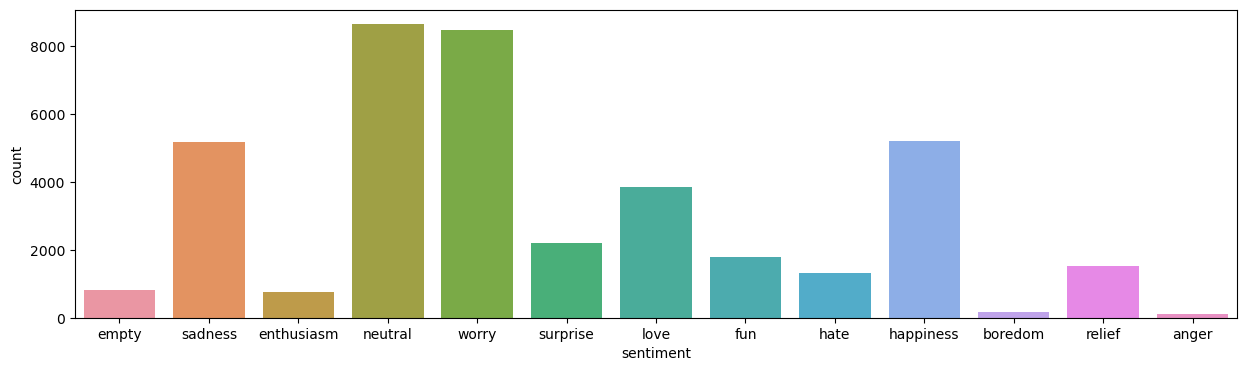

In [10]:
plt.figure(figsize=(15,4))
sns.countplot(x='sentiment', data=df);

In [11]:
#check if the data is balanced or not
df.sentiment.value_counts() / df.shape[0] *100

neutral       21.5950
worry         21.1475
happiness     13.0225
sadness       12.9125
love           9.6050
surprise       5.4675
fun            4.4400
relief         3.8150
hate           3.3075
empty          2.0675
enthusiasm     1.8975
boredom        0.4475
anger          0.2750
Name: sentiment, dtype: float64

The data is imbalanced so, we may try to balance it but also, the emotions that we interested in are the most repeated emotion so, till now we can keep the data as it is

In [12]:
df["content"][1:10]

1    Layin n bed with a headache  ughhhh...waitin o...
2                  Funeral ceremony...gloomy friday...
3                 wants to hang out with friends SOON!
4    @dannycastillo We want to trade with someone w...
5    Re-pinging @ghostridah14: why didn't you go to...
6    I should be sleep, but im not! thinking about ...
7                 Hmmm. http://www.djhero.com/ is down
8              @charviray Charlene my love. I miss you
9           @kelcouch I'm sorry  at least it's Friday?
Name: content, dtype: object

# Case Folding & Cleaning Data

In [13]:
# function to clean the tweets 
import re
def cleanTxt(text):
    text = re.sub(r'@\w+|#\w+', '', text) #Removing @mentions
    text = re.sub('#', '', text) # Removing '#' hash tag
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub('\w+:\/\/\S+', '', text) # Removing hyperlink
    #remove punctuation
    text = re.sub('[^a-zA-Z]', ' ', text)
    text.lower()
    return text

In [14]:
# case folding
temp = df['content'].str.lower()


In [15]:
temp

0        @tiffanylue i know  i was listenin to bad habi...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4        @dannycastillo we want to trade with someone w...
                               ...                        
39995                                     @johnlloydtaylor
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998    @niariley wassup beautiful!!! follow me!!  pee...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object

In [16]:
# remove hashtag and mention using regex

temp = temp.apply(lambda x: re.sub(r'@\w+|#\w+', '', x))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [17]:
# remove url using regex
temp = temp.apply(lambda x: re.sub(r'http\S+', '', x))
temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhh...waitin o...
2                      funeral ceremony...gloomy friday...
3                     wants to hang out with friends soon!
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mother's day to all the mommies out ther...
39998     wassup beautiful!!! follow me!!  peep out my ...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [18]:
# remove punctuation
temp = temp.apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39995                                                     
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 40000, dtype: object

In [19]:
# remove duplicate item
temp = temp.drop_duplicates()

temp

0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 39172, dtype: object

In [20]:
# remove number
temp = temp.apply(lambda x: re.sub(r'\d+', '', x))
temp


0         i know  i was listenin to bad habit earlier a...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4         we want to trade with someone who has houston...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998     wassup beautiful follow me  peep out my new h...
39999     bullet train from tokyo    the gf and i have ...
Name: content, Length: 39172, dtype: object

In [21]:
# check null value
temp.isnull().sum()

0

In [22]:
# remove whitespace
temp = temp.apply(lambda x: x.strip())

temp

0        i know  i was listenin to bad habit earlier an...
1        layin n bed with a headache  ughhhhwaitin on y...
2                            funeral ceremonygloomy friday
3                      wants to hang out with friends soon
4        we want to trade with someone who has houston ...
                               ...                        
39994                          succesfully following tayla
39996                       happy mothers day  all my love
39997    happy mothers day to all the mommies out there...
39998    wassup beautiful follow me  peep out my new hi...
39999    bullet train from tokyo    the gf and i have b...
Name: content, Length: 39172, dtype: object

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [53]:
# get most common words in training dataset
from collections import Counter 
all_words = []
for line in list(temp):
    words = line.split()
    for word in words:
        all_words.append(word.lower())
    
    
a=Counter(all_words).most_common(10)
a

[('im', 4359),
 ('good', 2193),
 ('like', 1922),
 ('dont', 1698),
 ('love', 1598),
 ('today', 1578),
 ('going', 1559),
 ('work', 1556),
 ('cant', 1492),
 ('time', 1347)]

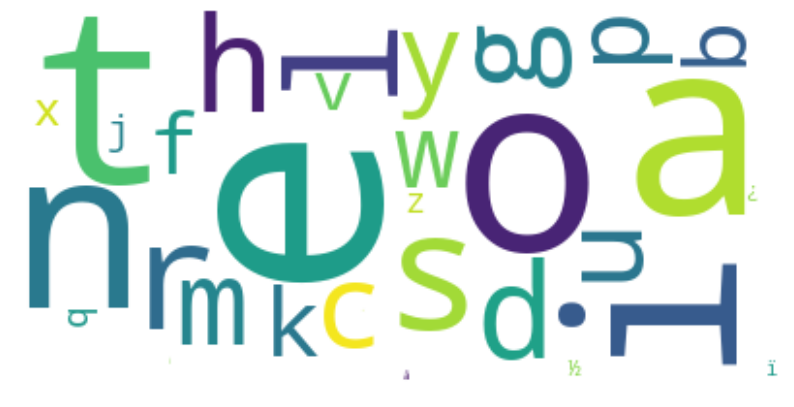

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# split sentences to get individual words
words = []
for line in temp: 
    words.extend(line)
    
# create a word frequency dictionary
wordfreq = Counter(words)
# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=22000,
    stopwords=stopwords
   ).generate_from_frequencies(wordfreq)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [55]:
from nltk.corpus import stopwords

from nltk.tokenize import word_tokenize

#stopwords = set(stopwords.words('english'))
stopwords = nltk.corpus.stopwords.words('english')

In [61]:
newStopWords = ['u','go','got','via','or','ur','us','in','i','let','the','to','is','amp','make','one','day','days','get','a','e','c','1/2']
stopwords.extend(newStopWords)

In [62]:
stopwords

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [69]:
# remove stopword

#stop = stopwords
#temp = temp.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))


In [73]:
import string 

def process(x):
    # Check characters to see if they are in punctuation
    nopunc = set(char for char in list(x) if char not in string.punctuation)
    # Join the characters to form the string.
    nopunc = " ".join(nopunc)
    # remove any stopwords if present
# remove stopword

stop = stopwords
temp = temp.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4                       want trade someone houston tickets
                               ...                        
39994                          succesfully following tayla
39996                                   happy mothers love
39997    happy mothers mommies woman man long youre mom...
39998    wassup beautiful follow peep new hit singles w...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

In [75]:
# lemmatization
lemmatizer = WordNetLemmatizer()

temp = temp.apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

temp

0        know listenin bad habit earlier started freaki...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                    want hang friend soon
4                        want trade someone houston ticket
                               ...                        
39994                          succesfully following tayla
39996                                    happy mother love
39997    happy mother mommy woman man long youre momma ...
39998    wassup beautiful follow peep new hit single ww...
39999    bullet train tokyo gf visiting japan since thu...
Name: content, Length: 39172, dtype: object

In [76]:
# tokenization
temp = temp.apply(lambda x: word_tokenize(x))

temp

0        [know, listenin, bad, habit, earlier, started,...
1            [layin, n, bed, headache, ughhhhwaitin, call]
2                        [funeral, ceremonygloomy, friday]
3                               [want, hang, friend, soon]
4                  [want, trade, someone, houston, ticket]
                               ...                        
39994                      [succesfully, following, tayla]
39996                                [happy, mother, love]
39997    [happy, mother, mommy, woman, man, long, youre...
39998    [wassup, beautiful, follow, peep, new, hit, si...
39999    [bullet, train, tokyo, gf, visiting, japan, si...
Name: content, Length: 39172, dtype: object

In [79]:
# temp to df content_token
df['content_token'] = temp
df

C:\Users\fatma.er\AppData\Local\Temp\ipykernel_12448\1085364148.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['content_token'] = temp


,tweet_id,sentiment,content,content_token
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket]"
...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,"[succesfully, following, tayla]"
39996,1753919001,love,Happy Mothers Day All my love,"[happy, mother, love]"
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[happy, mother, mommy, woman, man, long, youre..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[wassup, beautiful, follow, peep, new, hit, si..."


In [80]:
# remove NaN data in content_token
df = df.dropna(subset=['content_token'])
df

,tweet_id,sentiment,content,content_token
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]"
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]"
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket]"
...,...,...,...,...
39994,1753918900,happiness,Succesfully following Tayla!!,"[succesfully, following, tayla]"
39996,1753919001,love,Happy Mothers Day All my love,"[happy, mother, love]"
39997,1753919005,love,Happy Mother's Day to all the mommies out ther...,"[happy, mother, mommy, woman, man, long, youre..."
39998,1753919043,happiness,@niariley WASSUP BEAUTIFUL!!! FOLLOW ME!! PEE...,"[wassup, beautiful, follow, peep, new, hit, si..."


# Finding & Removing Duplicate Synonim

In [81]:
from nltk.corpus import wordnet
def find_synonym(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())
    return synonyms

df['synonym'] = df['content_token'].apply(lambda x: [find_synonym(word) for word in x])

In [82]:
df.head(5)

,tweet_id,sentiment,content,content_token,synonym
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,"[know, listenin, bad, habit, earlier, started,...","[[know, know, cognize, cognise, know, know, kn..."
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, headache, ughhhhwaitin, call]","[[], [nitrogen, N, atomic_number_7, north, due..."
2,1956967696,sadness,Funeral ceremony...gloomy friday...,"[funeral, ceremonygloomy, friday]","[[funeral], [], [Friday, Fri]]"
3,1956967789,enthusiasm,wants to hang out with friends SOON!,"[want, hang, friend, soon]","[[privation, want, deprivation, neediness, lac..."
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket]","[[privation, want, deprivation, neediness, lac..."


In [83]:
## Dictionary of word index
index_word = {}
for i, word in enumerate(df['content_token'].sum()):
    if word not in index_word:
        index_word[i] = word

In [84]:
words = [value for key, value in index_word.items()]
words

['know',
 'listenin',
 'bad',
 'habit',
 'earlier',
 'started',
 'freakin',
 'part',
 'layin',
 'n',
 'bed',
 'headache',
 'ughhhhwaitin',
 'call',
 'funeral',
 'ceremonygloomy',
 'friday',
 'want',
 'hang',
 'friend',
 'soon',
 'want',
 'trade',
 'someone',
 'houston',
 'ticket',
 'repinging',
 'didnt',
 'prom',
 'bc',
 'bf',
 'didnt',
 'like',
 'friend',
 'sleep',
 'im',
 'thinking',
 'old',
 'friend',
 'want',
 'he',
 'married',
 'damn',
 'want',
 'scandalous',
 'hmmm',
 'charlene',
 'love',
 'miss',
 'im',
 'sorry',
 'least',
 'friday',
 'cant',
 'fall',
 'asleep',
 'choked',
 'retainer',
 'ugh',
 'beat',
 'stupid',
 'song',
 'next',
 'rude',
 'watch',
 'hill',
 'london',
 'realise',
 'tourture',
 'week',
 'week',
 'late',
 'watch',
 'itonlinelol',
 'news',
 'storm',
 'electricity',
 'gone',
 'agreed',
 'sleepy',
 'even',
 'late',
 'fail',
 'lady',
 'gaga',
 'tweeted',
 'impressed',
 'video',
 'leaking',
 'know',
 'convinced',
 'always',
 'wanted',
 'signal',
 'give',
 'offdamn',
 

In [85]:
# set synonym dictionary using find_synonym function 
synonym_dict = {}
for word in words:
    synonym_dict.update({word : tuple([w.lower() for w in find_synonym(word)])})

In [86]:
synonym_dict

{'know': ('know',
  'know',
  'cognize',
  'cognise',
  'know',
  'know',
  'know',
  'know',
  'experience',
  'live',
  'acknowledge',
  'recognize',
  'recognise',
  'know',
  'know',
  'sleep_together',
  'roll_in_the_hay',
  'love',
  'make_out',
  'make_love',
  'sleep_with',
  'get_laid',
  'have_sex',
  'know',
  'do_it',
  'be_intimate',
  'have_intercourse',
  'have_it_away',
  'have_it_off',
  'screw',
  'fuck',
  'jazz',
  'eff',
  'hump',
  'lie_with',
  'bed',
  'have_a_go_at_it',
  'bang',
  'get_it_on',
  'bonk',
  'know',
  'know',
  'know'),
 'listenin': (),
 'bad': ('bad',
  'badness',
  'bad',
  'bad',
  'big',
  'bad',
  'tough',
  'bad',
  'spoiled',
  'spoilt',
  'regretful',
  'sorry',
  'bad',
  'bad',
  'uncollectible',
  'bad',
  'bad',
  'bad',
  'risky',
  'high-risk',
  'speculative',
  'bad',
  'unfit',
  'unsound',
  'bad',
  'bad',
  'bad',
  'forged',
  'bad',
  'defective',
  'badly',
  'bad',
  'badly',
  'bad'),
 'habit': ('habit',
  'wont',
  'habi

In [87]:
# remove duplicate synonym
for key, value in synonym_dict.items():
    synonym_dict[key] = tuple(set(value))

synonym_dict

{'know': ('hump',
  'bed',
  'have_it_off',
  'live',
  'bang',
  'get_laid',
  'have_it_away',
  'recognise',
  'cognise',
  'bonk',
  'cognize',
  'fuck',
  'do_it',
  'recognize',
  'get_it_on',
  'make_out',
  'roll_in_the_hay',
  'sleep_together',
  'love',
  'experience',
  'make_love',
  'have_intercourse',
  'jazz',
  'lie_with',
  'have_a_go_at_it',
  'screw',
  'acknowledge',
  'eff',
  'know',
  'sleep_with',
  'have_sex',
  'be_intimate'),
 'listenin': (),
 'bad': ('badly',
  'regretful',
  'high-risk',
  'forged',
  'unfit',
  'unsound',
  'big',
  'speculative',
  'defective',
  'spoilt',
  'spoiled',
  'uncollectible',
  'badness',
  'bad',
  'risky',
  'sorry',
  'tough'),
 'habit': ('wont',
  'substance_abuse',
  'use',
  'habit',
  'drug_abuse',
  'riding_habit'),
 'earlier': ('earlier',
  'to_begin_with',
  'in_the_first_place',
  'originally',
  'in_the_beginning',
  'earliest',
  'former',
  'early',
  'before',
  'sooner',
  'other'),
 'started': ('lead_off',
  'j

In [88]:
# remove null value in synonym_dict
synonym_dict = {k: v for k, v in synonym_dict.items() if v}

synonym_dict

{'know': ('hump',
  'bed',
  'have_it_off',
  'live',
  'bang',
  'get_laid',
  'have_it_away',
  'recognise',
  'cognise',
  'bonk',
  'cognize',
  'fuck',
  'do_it',
  'recognize',
  'get_it_on',
  'make_out',
  'roll_in_the_hay',
  'sleep_together',
  'love',
  'experience',
  'make_love',
  'have_intercourse',
  'jazz',
  'lie_with',
  'have_a_go_at_it',
  'screw',
  'acknowledge',
  'eff',
  'know',
  'sleep_with',
  'have_sex',
  'be_intimate'),
 'bad': ('badly',
  'regretful',
  'high-risk',
  'forged',
  'unfit',
  'unsound',
  'big',
  'speculative',
  'defective',
  'spoilt',
  'spoiled',
  'uncollectible',
  'badness',
  'bad',
  'risky',
  'sorry',
  'tough'),
 'habit': ('wont',
  'substance_abuse',
  'use',
  'habit',
  'drug_abuse',
  'riding_habit'),
 'earlier': ('earlier',
  'to_begin_with',
  'in_the_first_place',
  'originally',
  'in_the_beginning',
  'earliest',
  'former',
  'early',
  'before',
  'sooner',
  'other'),
 'started': ('lead_off',
  'jump',
  'start',


In [89]:
import collections
value_occurrences = collections.Counter(synonym_dict.values())

filtered_synonym = {key: value for key, value in synonym_dict.items() if value_occurrences[value] == 1}

In [90]:
filtered_synonym

{'bad': ('badly',
  'regretful',
  'high-risk',
  'forged',
  'unfit',
  'unsound',
  'big',
  'speculative',
  'defective',
  'spoilt',
  'spoiled',
  'uncollectible',
  'badness',
  'bad',
  'risky',
  'sorry',
  'tough'),
 'habit': ('wont',
  'substance_abuse',
  'use',
  'habit',
  'drug_abuse',
  'riding_habit'),
 'earlier': ('earlier',
  'to_begin_with',
  'in_the_first_place',
  'originally',
  'in_the_beginning',
  'earliest',
  'former',
  'early',
  'before',
  'sooner',
  'other'),
 'started': ('lead_off',
  'jump',
  'start',
  'go',
  'originate',
  'pop_out',
  'start_up',
  'initiate',
  'embark_on',
  'bulge',
  'protrude',
  'set_off',
  'set_about',
  'part',
  'take_off',
  'depart',
  'commence',
  'get_down',
  'take_up',
  'pop',
  'set_forth',
  'start_out',
  'begin',
  'bulge_out',
  'bug_out',
  'get',
  'startle',
  'come_out',
  'get_going',
  'set_out'),
 'part': ('start',
  'piece',
  'component',
  'set_off',
  'function',
  'part',
  'take_off',
  'depar

# Function for augmenting data by replacing words with synonym using spaCy

In [91]:
import re
import random
sr = random.SystemRandom()
split_pattern = re.compile(r'\s+')
def data_augmentation(message, aug_range=1) :
    augmented_messages = []
    for j in range(0,aug_range) :
        new_message = ""
        for i in filter(None, split_pattern.split(message)) :
            new_message = new_message + " " + sr.choice(filtered_synonym.get(i,[i]))
        augmented_messages.append(new_message)
    return augmented_messages

In [92]:
tweet_count = df.sentiment.value_counts().to_dict()

In [93]:
## Get max intent count to match other minority classes through data augmentation
import operator
max_intent_count = max(tweet_count.items(), key=operator.itemgetter(1))[1]


Balancing Data Because sentiment data is very far apart, for example neutral contains 8638 data, while anger contains 110 data. We decided to balance the data to make the data fairer in terms of accuracy learning later. We use the Oversampling method, which means adding synthetic data that refers to the largest amount of data in the dataset.

In [94]:
import numpy as np
import math
import tqdm
newdf = pd.DataFrame()
for intent, count in tweet_count.items() :
    count_diff = max_intent_count - count    ## Difference to fill
    multiplication_count = math.ceil((count_diff)/count)  ## Multiplying a minority classes for multiplication_count times
    if (multiplication_count) :
        old_message_df = pd.DataFrame()
        new_message_df = pd.DataFrame()
        for message in tqdm.tqdm(df[df["sentiment"] == intent]['content'].values) :
            ## Extracting existing minority class batch
            dummy1 = pd.DataFrame([message], columns=['content'])
            dummy1["sentiment"] = intent
            # concat existing minority class batch
            old_message_df = pd.concat([old_message_df, dummy1])

            ## Creating new augmented batch from existing minority class
            new_messages = data_augmentation(message,  multiplication_count)
            dummy2 = pd.DataFrame(new_messages, columns=['content'])
            dummy2["sentiment"] = intent
            # concat new augmented batch
            new_message_df = pd.concat([new_message_df, dummy2])

        ## Select random data points from augmented data
        new_message_df=new_message_df.take(np.random.permutation(len(new_message_df))[:count_diff])
        
        ## Merge existing and augmented data points using concat
        newdf = pd.concat([newdf, old_message_df, new_message_df])
        # newdf = newdf.append([old_message_df,new_message_df])
    else :
        newdf = pd.concat([newdf, df[df["sentiment"] == intent]])
        # newdf = newdf.append(df[df["Intent"] == intent])

100%|██████████| 110/110 [00:00<00:00, 314.42it/s]


In [95]:
newdf

,tweet_id,sentiment,content,content_token,synonym
4,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"[want, trade, someone, houston, ticket]","[[privation, want, deprivation, neediness, lac..."
10,1.956969e+09,neutral,cant fall asleep,"[cant, fall, asleep]","[[buzzword, cant, bank, cant, camber, slang, c..."
22,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"[topic, map, talk, balisage, markup, conferenc...","[[subject, topic, theme, topic, subject, issue..."
31,1.956975e+09,neutral,@cynthia_123 i cant sleep,"[cant, sleep]","[[buzzword, cant, bank, cant, camber, slang, c..."
32,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"[missed, bly, bus]","[[miss, lose, miss, miss, neglect, pretermit, ..."
...,...,...,...,...,...
49,NaN,anger,"@LeahMul awh, thats not good, get comfortably...",NaN,NaN
22,NaN,anger,@BigCatJared What did I coif to you! sheesh,NaN,NaN
66,NaN,anger,@eminem http://twitpic.com/4j585 - Guess I de...,NaN,NaN
12,NaN,anger,@eminem http://twitpic.com/4j585 - Guess I ta...,NaN,NaN


In [96]:
newdf.value_counts('sentiment')

sentiment
anger         8356
boredom       8356
empty         8356
enthusiasm    8356
fun           8356
happiness     8356
hate          8356
love          8356
neutral       8356
relief        8356
sadness       8356
surprise      8356
worry         8356
dtype: int64

In [97]:
## Save newdf to csv file
newdf.to_csv('augmented_data.csv', index=False)

In [98]:
clean_df = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/Text-Mining-and-Sentiment-Analysis-P8/main/Data/augmented_data.csv')
clean_df.head()

,tweet_id,sentiment,content,content_token,synonym
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine..."
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'..."
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'..."
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '..."


In [99]:
clean_df.value_counts('sentiment')

sentiment
anger         8356
boredom       8356
empty         8356
enthusiasm    8356
fun           8356
happiness     8356
hate          8356
love          8356
neutral       8356
relief        8356
sadness       8356
surprise      8356
worry         8356
dtype: int64

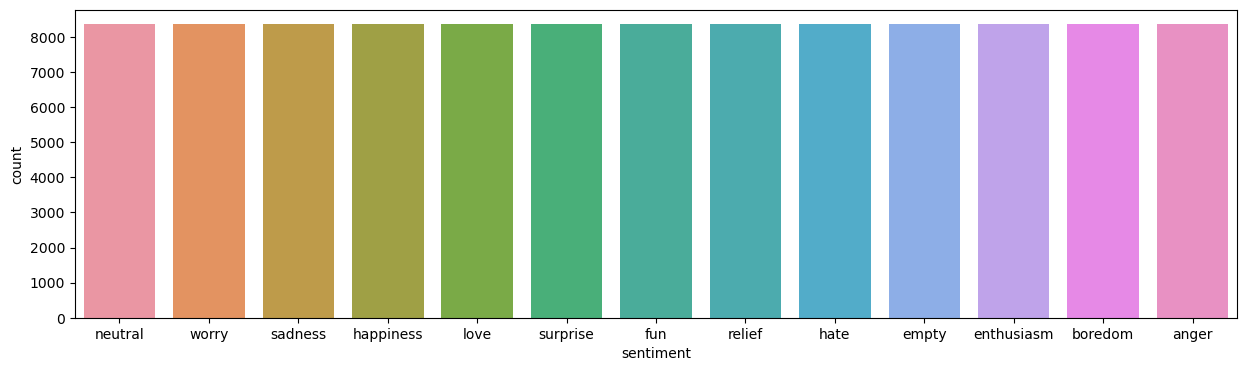

In [100]:
plt.figure(figsize=(15,4))
sns.countplot(x='sentiment', data=clean_df);

In [101]:
# cleaning the tweets using clean_tweet function

clean_df['clean_tweet'] = clean_df['content'].apply(lambda x: cleanTxt(x))

In [102]:
clean_df

,tweet_id,sentiment,content,content_token,synonym,clean_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",We want to trade with someone who has Houston...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",No Topic Maps talks at the Balisage Markup Con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",I missed the bl y bus
...,...,...,...,...,...,...
108623,NaN,anger,Did a historic Jesus of_all_time exist? Im wi...,NaN,NaN,Did a historic Jesus of all time exist Im wi...
108624,NaN,anger,@mikeavila ack! I just interpret about your t...,NaN,NaN,ack I just interpret about your testify tha...
108625,NaN,anger,ne'er does anything dear cultivate and lapin ...,NaN,NaN,ne er does anything dear cultivate and lapin ...
108626,NaN,anger,@mashable Link to ff &quot;how it works&quot;...,NaN,NaN,Link to ff quot how it works quot is broke


In [103]:
# lower casing clean_tweet column

clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: x.lower())

clean_df.head(5)

,tweet_id,sentiment,content,content_token,synonym,clean_tweet
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",we want to trade with someone who has houston...
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",no topic maps talks at the balisage markup con...
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",i cant sleep
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",i missed the bl y bus


In [104]:
# function to remove stop words from clean_tweet column

def remove_stopwords(text):
    text = [word for word in text.split() if word not in stop]
    return " ".join(text)

In [105]:
# stopword removal
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: remove_stopwords(x))

In [106]:
# function to lemmitize clean_tweet column

def lemmatization(text):
    text = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(text)

In [107]:
# lemmitization
clean_df['clean_tweet'] = clean_df['clean_tweet'].apply(lambda x: lemmatization(x))

In [108]:
# tokenization using word_tokenize
clean_df['clean_tweet_token'] = clean_df['clean_tweet'].apply(lambda x: word_tokenize(x))
clean_df.head()

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"[want, trade, someone, houston, ticket]"
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"[cant, fall, asleep]"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"[topic, map, talk, balisage, markup, conferenc..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"[cant, sleep]"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"[missed, bl, bus]"


In [109]:
## Save clean_df to csv file.
clean_df.to_csv('Model_data.csv', index=False)

In [110]:
clean_df = pd.read_csv('Model_data.csv')

In [111]:
clean_df

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']"
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']"
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',..."
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']"
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']"
...,...,...,...,...,...,...,...
108623,NaN,anger,Did a historic Jesus of_all_time exist? Im wi...,NaN,NaN,historic jesus time exist im witness hard prov...,"['historic', 'jesus', 'time', 'exist', 'im', '..."
108624,NaN,anger,@mikeavila ack! I just interpret about your t...,NaN,NaN,ack interpret testify horrible accounting taste,"['ack', 'interpret', 'testify', 'horrible', 'a..."
108625,NaN,anger,ne'er does anything dear cultivate and lapin ...,NaN,NaN,ne er anything dear cultivate lapin life histo...,"['ne', 'er', 'anything', 'dear', 'cultivate', ..."
108626,NaN,anger,@mashable Link to ff &quot;how it works&quot;...,NaN,NaN,link ff quot work quot broke,"['link', 'ff', 'quot', 'work', 'quot', 'broke']"


In [117]:
sent_to_id  = {"empty":0, "sadness":1,"enthusiasm":2,"neutral":3,"worry":4,
                        "surprise":5,"love":6,"fun":7,"hate":8,"happiness":9,"boredom":10,"relief":11,"anger":12}

In [118]:
clean_df["sentiment_id"] = clean_df['sentiment'].map(sent_to_id)

In [119]:
clean_df

,tweet_id,sentiment,content,content_token,synonym,clean_tweet,clean_tweet_token,sentiment_id
0,1.956968e+09,neutral,@dannycastillo We want to trade with someone w...,"['want', 'trade', 'someone', 'houston', 'ticke...","[['privation', 'want', 'deprivation', 'needine...",want trade someone houston ticket,"['want', 'trade', 'someone', 'houston', 'ticket']",3
1,1.956969e+09,neutral,cant fall asleep,"['cant', 'fall', 'asleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant fall asleep,"['cant', 'fall', 'asleep']",3
2,1.956972e+09,neutral,No Topic Maps talks at the Balisage Markup Con...,"['topic', 'map', 'talk', 'balisage', 'markup',...","[['subject', 'topic', 'theme', 'topic', 'subje...",topic map talk balisage markup conference prog...,"['topic', 'map', 'talk', 'balisage', 'markup',...",3
3,1.956975e+09,neutral,@cynthia_123 i cant sleep,"['cant', 'sleep']","[['buzzword', 'cant', 'bank', 'cant', 'camber'...",cant sleep,"['cant', 'sleep']",3
4,1.956976e+09,neutral,I missed the bl***y bus!!!!!!!!,"['missed', 'bly', 'bus']","[['miss', 'lose', 'miss', 'miss', 'neglect', '...",missed bl bus,"['missed', 'bl', 'bus']",3
...,...,...,...,...,...,...,...,...
108623,NaN,anger,Did a historic Jesus of_all_time exist? Im wi...,NaN,NaN,historic jesus time exist im witness hard prov...,"['historic', 'jesus', 'time', 'exist', 'im', '...",12
108624,NaN,anger,@mikeavila ack! I just interpret about your t...,NaN,NaN,ack interpret testify horrible accounting taste,"['ack', 'interpret', 'testify', 'horrible', 'a...",12
108625,NaN,anger,ne'er does anything dear cultivate and lapin ...,NaN,NaN,ne er anything dear cultivate lapin life histo...,"['ne', 'er', 'anything', 'dear', 'cultivate', ...",12
108626,NaN,anger,@mashable Link to ff &quot;how it works&quot;...,NaN,NaN,link ff quot work quot broke,"['link', 'ff', 'quot', 'work', 'quot', 'broke']",12


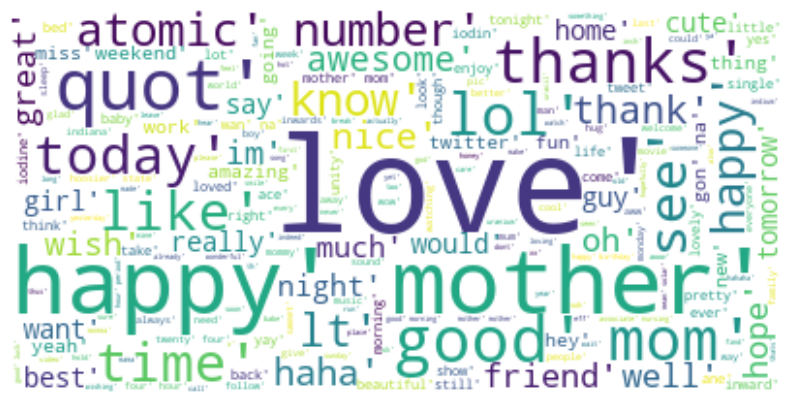

In [121]:
love = [r for r in clean_df['clean_tweet_token'][clean_df['sentiment_id']==6]]
pos = ''.join(love)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

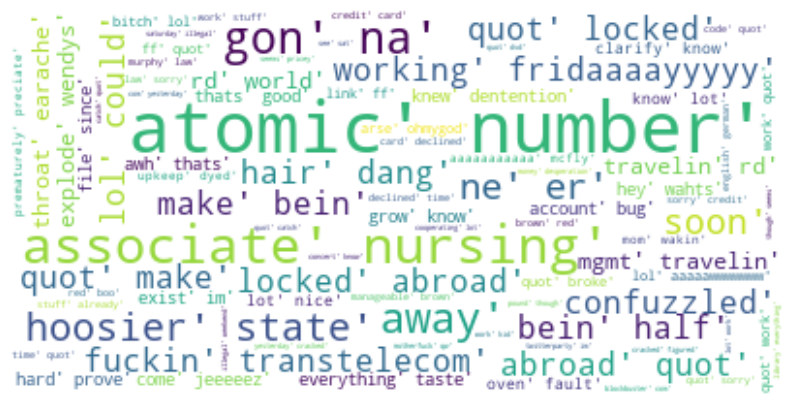

In [122]:
anger = [r for r in clean_df['clean_tweet_token'][clean_df['sentiment_id']==12]]
pos = ''.join(anger)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

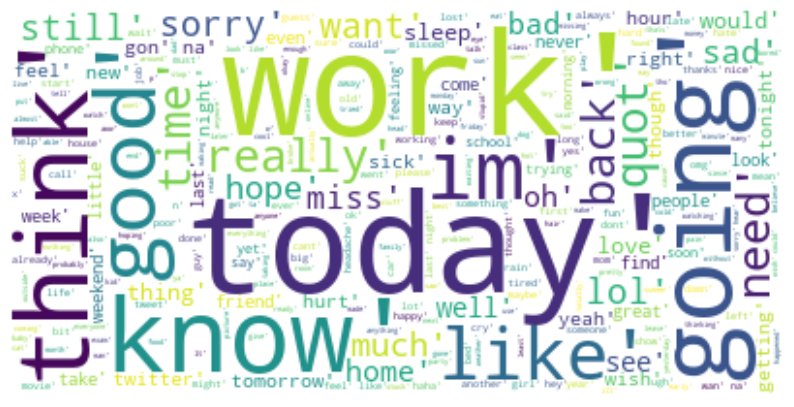

In [123]:
worry = [r for r in clean_df['clean_tweet_token'][clean_df['sentiment_id']==4]]
pos = ''.join(worry)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

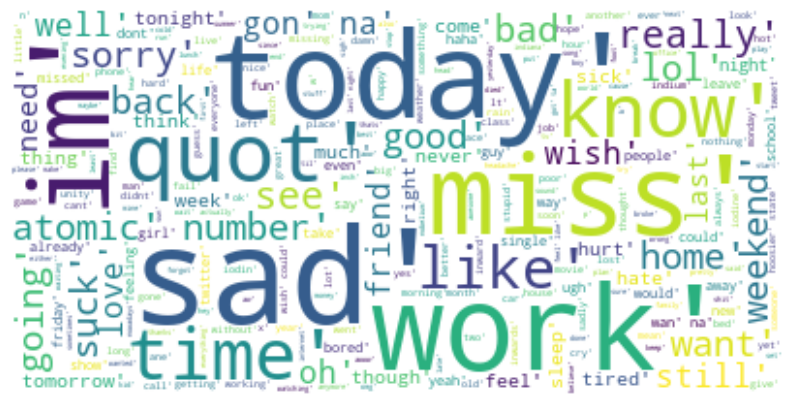

In [124]:
sadness = [r for r in clean_df['clean_tweet_token'][clean_df['sentiment_id']==1]]
pos = ''.join(sadness)

# draw a Word Cloud with word frequencies
wordcloud = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
   ).generate(pos)
plt.figure(figsize=(10,9))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

https://www.kaggle.com/code/youssefelzahar/emotion-text 

https://www.kaggle.com/code/akhmadramadani/tweet-emotions-classification 


https://www.kaggle.com/code/rishabh2007/emotion-detection-sentiment-analysis-2-4